# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [79]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd


In [80]:
# Create to an open browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [81]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

#connect url to an opened browser
browser.visit(url) 

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [82]:
#  Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')


In [83]:
# Scrape the data-
read_html = pd.read_html(url)

# unpack html table into a dataframe
read_html[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [84]:
# Create an empty list to store the scraped data to put into df
mars_weather = []

# Loop through the scraped data to create a table
for row in read_html:
    mars_weather.append(row)

mars_weather

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [85]:
# Take mars_weather table and convert it to a dataframe
mars_weather_df = pd.DataFrame(mars_weather[0], columns = ['id', 'terrestrial_date',
                                    'sol', 'ls', 'month', 'min_temp', 'pressure']) 
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [86]:
# Examine data type of each column
mars_weather_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [87]:
#imports
from datetime import datetime

#convert terrestrial_date object to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'], format='%Y-%m-%d')


In [88]:
# Confirm type changes were successful by examining data types again    
mars_weather_df.dtypes


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [89]:
# 1. How many months are there on Mars?
num_months = mars_weather_df['terrestrial_date'].dt.month.nunique()
num_months

12

In [90]:
# 2. How many Martian days' worth of data are there?
num_days = mars_weather_df['sol'].count()
num_days


1867

In [91]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_weather_df.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

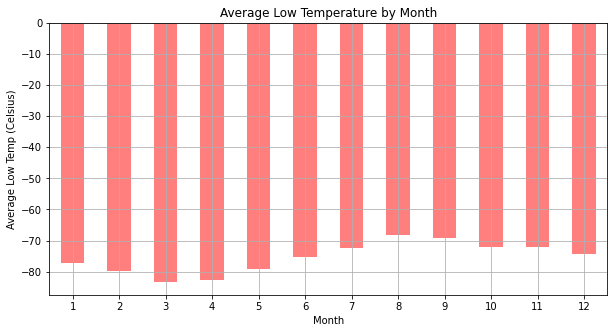

In [92]:
# Plot the average low temperature by month
avg_low_temp.plot(kind='bar', figsize=(10,5), color='red', alpha=0.5, align="center")

# Set title, axes, and characteristics for the chart    
plt.title("Average Low Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Low Temp (Celsius)")
plt.xticks(rotation= 0)
plt.grid(True)

#show graph
plt.show()


In [93]:
# Identify the coldest months in Curiosity's location

#create list of months/temps
temps_mo =  mars_weather_df.groupby("month")['min_temp'].min()

# identify coldest months from temps_mo
cold_mo = temps_mo.idxmin()
print(f"coldest month: {cold_mo}")


coldest month: 3


In [94]:
# Identify hottest months in Curiosity's location
hot_mo = temps_mo.idxmax()
print(f"hottest month: {hot_mo}")


hottest month: 8


In [95]:
# 4. Average pressure by Martian month
pres_avg =  mars_weather_df.groupby("month")['pressure'].mean()
print(f"Average pressure by Martian {pres_avg}")


Average pressure by Martian month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


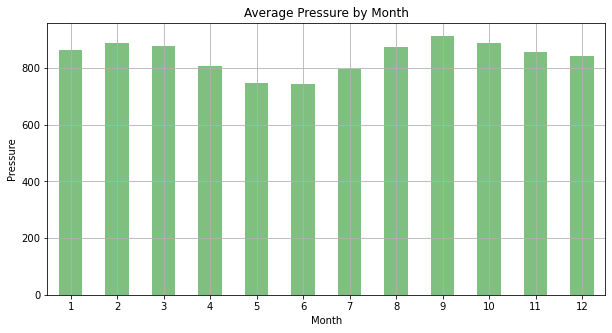

In [96]:
# Plot the average pressure by month
pres_avg.plot(kind='bar', figsize=(10,5), color='green', alpha=0.5, align="center")

# Set title, axes, and characteristics for the chart    
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.xticks(rotation= 0)
plt.grid(True)

#show graph
plt.show()


In [97]:
# 5.   How many terrestrial days exist in a Martian year?

import plotly.graph_objs as go

# Create a line plot with hover points
fig = go.Figure()

fig.add_trace(go.Scatter(x=mars_weather_df['terrestrial_date'],
                         y=mars_weather_df['min_temp'],
                         mode='lines+markers',
                         name='Daily Minimum Temperature',
                         hovertemplate='Terrestrial Date: %{x}<br>Min Temp: %{y}°C'))

# Set title and labels for axes
fig.update_layout(title='Martian Temp Changes Charted Over Earth Time',
                  xaxis_title='Terrestrial Date',
                  yaxis_title='Daily Minimum Temperature (*C)')

fig.show()

 Based on visual observation, approximately how many terrestral days exist in a Martian year? 

# One revolution around the sun is represented by the distance from peak to peak, or valley to valley. On visual observation, time between peaks is appears to be less than two years. The seemingly negative skew of the data between peaks suggest this as well. Hoverpoint data appears inconclusive without set peak points.

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [98]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather.csv', index=False)


In [99]:
browser.quit()